# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [21]:
from typing import Tuple, List
from pathlib import Path
import cv2 # computer vision library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import helpers

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
# image_dir_training = "day_night_images/training/"
# image_dir_test = "day_night_images/test/"
image_dir_training: str = Path().absolute().joinpath("day_night_images/training/").__str__()
image_dir_test: str = Path().absolute().joinpath("day_night_images/test/").__str__()
image_dir_training, image_dir_test

('c:\\Users\\Chandan\\workspace\\repos\\cv-nanodegree-exercises\\1_1_Image_Representation\\day_night_images\\training',
 'c:\\Users\\Chandan\\workspace\\repos\\cv-nanodegree-exercises\\1_1_Image_Representation\\day_night_images\\test')

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [5]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

---
# 1. Visualize the input images


In [9]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print(f'Shape of the image: {selected_image.shape}')
print(f'Image label: {selected_label}')

Shape of the image: (458, 800, 3)
Image label: day


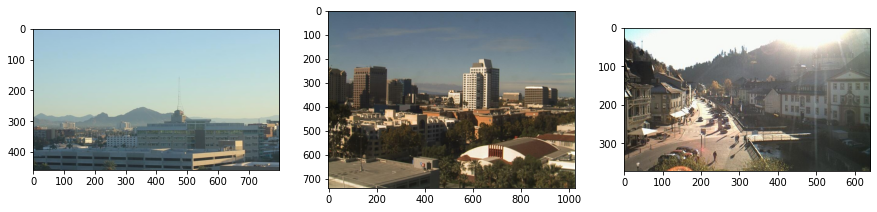

In [24]:
# Display some day images
day_images: List[Tuple[np.ndarray, str]] = list(filter(lambda x: x[1] == 'day', IMAGE_LIST))
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(day_images[0][0])
ax2.imshow(day_images[20][0])
ax3.imshow(day_images[67][0])

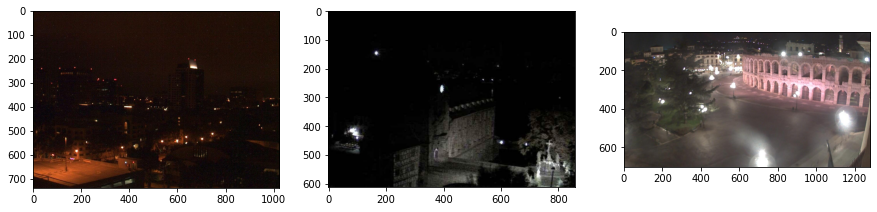

In [25]:
## TODO: Display some night images
night_images: List[Tuple[np.ndarray, str]] = list(filter(lambda x: x[1] == 'night', IMAGE_LIST))
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(night_images[0][0])
ax2.imshow(night_images[20][0])
ax3.imshow(night_images[67][0])

In [26]:
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images

### Noted Difference between a day and night Image

* Pixel intensities are relatively higher in day images, compared to the night ones. (Can be used as a general distinguishing features for the night images)
* In some of the day images the blue tone of the sky is prominent, which can not be said about the night images.
* In night images there are frequent spikes in pixel intensities in some parts of the image due to night time illuminations.
* If we take pixel intensity distributions of day images, for most cases (where there is no strong impact of sunlight) the distribution would be closer to normal, where as the same distributions for night images are likely to be skewed.